In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

## load data

In [23]:
data = np.load('testviz/testviz_data.npy')
labels = np.load('testviz/testviz_labels.npy')
mask = np.load('testviz/testviz_mask.npy')
label_flat =  np.load('testviz/testviz_label_flat.npy')

In [24]:
data.shape, labels.shape,mask.shape, label_flat.shape

((256, 2016, 231), (256, 2016), (256, 2016), (60204,))

In [25]:
## label_flat = torch.masked_select(labels, mask)

In [154]:
pid = 55#40 #4,18,44**,51**,55*** best,25,29,39,40

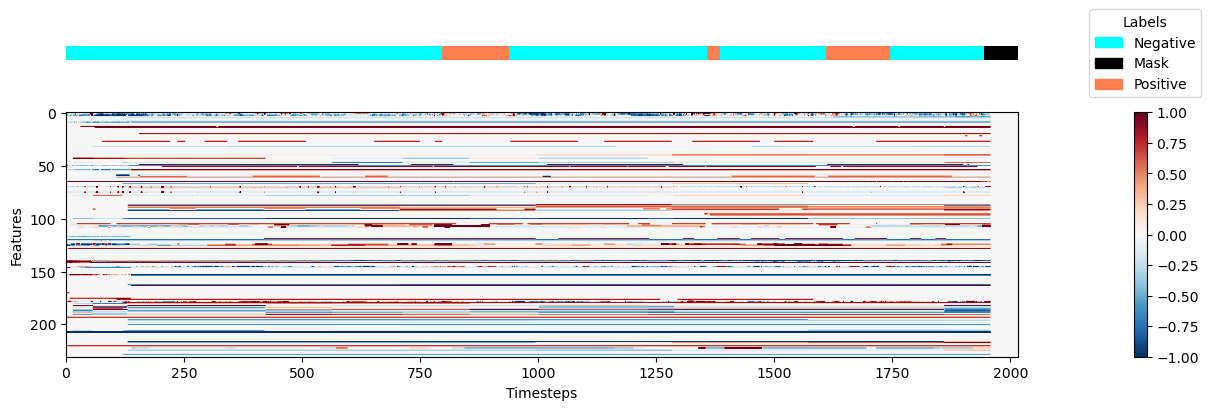

In [155]:
dtest_x = data[pid].T
## plot labels
dtest_y_2d = np.expand_dims(labels[pid], axis=0)
fig, axs = plt.subplots(2, 1, figsize=(12, 4), gridspec_kw={'height_ratios': [1, 3]}, sharex=True,layout='constrained')

color_map = {-1: '#00FFFF', 0: 'black', 1: '#FF7F50'}
colors = np.vectorize(color_map.get)(dtest_y_2d)
# Bar plot adjusted to match the width of the plot below
for i, color in enumerate(colors.flatten()):
    axs[0].plot([i, i+1], [0, 0], color=color, linewidth=10)
axs[0].axis('off')
legend_labels = {-1: "Negative", 0: "Mask", 1: "Positive"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# Adjusting xlim to ensure the top bar matches the width of the plot below
axs[0].set_xlim(0, 2016)
axs[0].legend(handles=legend_handles, loc='center right', title="Labels",
              bbox_to_anchor=(1.2, 0.5),
              # ncol=len(legend_handles)
             )

# Feature-Time Visualization adjusted
im = axs[1].imshow(dtest_x, aspect='auto', cmap='RdBu_r',vmin=-1, vmax=1)
fig.colorbar(im, ax=axs[1], 
             location = 'right',
             orientation='vertical',
             # fraction=0.9,
             # aspect=2,
             pad=-0.06,
             # bbox_to_anchor=(0.1,0,1,1),
             # shrink=0.9,
             # anchor=(0.5, 0.5)
            )
axs[1].set_xlabel('Timesteps')
axs[1].set_ylabel('Features')
# plt.tight_layout()
# plt.savefig('03_nwtworks_05.png', dpi=1200, bbox_inches='tight')
plt.show()

#### get 1D label image

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate a larger 1D numpy array with -1 and 1 values
# np.random.seed(0)  # For reproducibility
# data = np.random.choice([-1, 1], size=50)

# # Reshape data for imshow
# data_reshaped = data.reshape(1, -1)  # Make it 2D with 1 row

# # Create a colormap that maps -1 to red and 1 to blue
# from matplotlib.colors import LinearSegmentedColormap
# cmap = LinearSegmentedColormap.from_list("my_cmap", ["#FF7F50", "#00FFFF"], N=2)

# # Display the array with the custom colormap
# plt.figure(figsize=(10, 1))
# plt.imshow(data_reshaped, cmap=cmap, aspect='auto')
# plt.axis('off')  # Hide axes

# plt.colorbar(ticks=[-1, 1], aspect=10).set_label('Value')  # Optional: add a colorbar for reference

# plt.show()


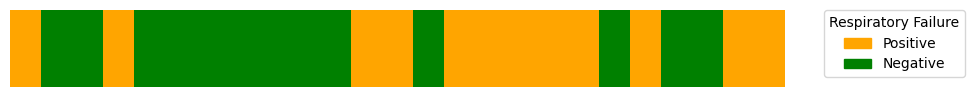

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Function to generate random values in chunks
def generate_chunks(length, chunk_size=10):
    """Generate an array of -1 and 1 values in chunks."""
    chunks = length // chunk_size
    remainder = length % chunk_size
    data = []
    for _ in range(chunks):
        value = np.random.choice([-1, 1])
        data.extend([value] * chunk_size)
    data.extend([np.random.choice([-1, 1])] * remainder)
    return np.array(data)

# Generate a larger 1D numpy array with -1 and 1 values in chunks
np.random.seed(0)  # For reproducibility
data = generate_chunks(50, chunk_size=2)  # Example: 50 values with chunks of size 10

# Define a colormap: -1 (red) for no respiratory failure, 1 (blue) for respiratory failure
cmap = plt.matplotlib.colors.ListedColormap(["orange", "green"])
bounds = [-1.5, -0.5, 1.5]
norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# Plotting
plt.figure(figsize=(10, 1))
plt.imshow(data.reshape(1, -1), cmap=cmap, norm=norm, aspect='auto')
plt.axis('off')  # Hide axes

# Create a legend
labels = ['Positive', 'Negative']
colors = ["orange", "green"]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(2)]
plt.legend(title='Respiratory Failure', handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('images/06_dynamic_prediction.png', dpi=1200, bbox_inches='tight')
plt.show()
